## 1) Inspiration

As a long-time Steam user and gaming enthusiast, I chose this dataset to explore how game attributes relate to player behavior, popularity, and commercial outcomes. Steam offers a vast and diverse catalog, making it an ideal environment for uncovering trends in what players enjoy and how trends differ across genres. Because I’ve purchased and played games on the platform for years, the subject is personally interesting, and a data-driven project in this space felt both worthwhile and insightful.

## 2) Problem Statements 


- What kind of game should large-scale game developers make based on recent trends?
      
- What features are common among the best performing games on Steam?
      
- How does success vary within different genres?

## 3) Data


My datasets are the [Steam Monthly Average Players Dataset](https://www.kaggle.com/datasets/lunthu/steam-monthly-average-players), and the [Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset), both from Kaggle, where the curators gathered and formatted Steam API data.

The Monthly Average Players Dataset has:

 - 612,265 observations, 7 total variables
 - 3 categorical variables
 - 4 numeric variables
 - Each observation represents a game during a specific month
 - Each variable represents the name of the game, its Steam ID, average player count, or other statistic about the game during that month.
 - In this report, 4 variables are used: month, name, avg_players, and app_id.

The Steam Games Dataset has:

 - 111,452 observations, 42 total variables
 - 27 categorical variables
 - 15 numeric variables
 - Each observation represents a unique game
 - Each variable represents the name of the game, its Steam ID, the genres it is a part of, or other fact about the game.
 - In this report, 19 variables are used: genres, positive, negative, estimated_owners, average_playtime_forever, peak_ccu, tags, required_age, price, dlc_count, windows, linux, mac, achievements, recommendations, user_score, average_playtime_2weeks, median_playtime_2weeks, and median_playtime_forever.

## 4) Stakeholders


The primary stakeholders are game developers and the Steam platform. Developers benefit from understanding which game features, tags, and genres are correlated with strong player engagement, since building a game in a declining or highly oversaturated genre can increase financial risk. Steam benefits because identifying which games overperform relative to their genre norms can improve how they select which games should be featured on the store and recommended to players. Insights into player count patterns across genres may help Steam highlight titles that users are more likely to enjoy, improving customer retention and visibility for new and up-and-coming games.

## 5) Data Cleaning 


### a) Cleaning - Question 1

The Monthly Average Players Dataset has no missing or obviously incorrect values. However, in the primary column used for answering this question, `avg_players`, 97,477 observations (of 612,265 total) sit outside of Tukey's Fences. This is expected for a distribution of average players of different video games, since there are going to be massively popular games with tens of thousands of players as well as many poor-performing games with single-digit numbers of players. It does not make sense to remove these outliers, since the analysis would be sparse without them.

In the Steam Games Dataset, among the variables used for Question 1, only one had missing values. The `genres` value was set to an empty list for 6440 games in the dataset, mostly playtest games that had all numeric variables equal to 0. Because a games genres is incredibly difficult to impute without any other info besides its name, and that we do not want to consider games without any genres when analyzing trends with genres, I chose to remove observations without any genres. There were no incorrect values in the genres column.

For this question and the following, there are some columns of the Steam Games Dataset that are irrelevant. Most of the irrelevant columns contain descriptions about the game or links relating to the game. The irrelevant columns are: `detailed_description`, `about_the_game`, `short_description`, `reviews`, `header_image`, `website`, `support_url`, `support_email`, `metacritic_url`, `screenshots`, and `movies`. These columns were dropped from the dataset and unused for the remainder of the project.

Since this question is focusing on what kind of game a large studio should make, it makes sense to remove genres with few games in them. These genres represent small markets that do not make sense to spend a lot of time and money making a game for. I excluded genres with less than 500 games in them (only keeping genres with > ~0.5% of overall market share) from the analysis. Also, "Free to Play" had an alternate name "Free To Play". The labels were merged to create one unified "Free to Play" genre.

The kept genres were: 
`Indie`, `Casual`, `Action`, `Adventure`, `Simulation`, `Strategy`, 
`RPG`, `Early Access`, `Free to Play`, `Sports`, `Racing`, 
`Massively Multiplayer`, `Utilities`, `Design & Illustration`, `Violent`.

The final cleaned Steam Games data for question 1 analysis contained 104,631 games out of the 111,452 initially present in the dataset.


### b) Cleaning - Question 2

The Monthly Average Players Dataset was not used for this question.

In the Steam Games Dataset, there are some missing values. In the `discount` column, there are 97,410 missing values. Because this represents almost 90% of all games in the dataset, this means that the discount column is not very useful for any analysis. It was considered that discount being NA could mean a game has never been on discount, however, there are some games with a discount value of 0. For these reasons, I chose to drop `discount` values from the dataset, and not use it for the project.

Another column in the Steam Games Dataset, `peak_ccu`, representing the Peak Concurrent Playercount for a game, had some subtle issues despite not missing any data. Take the game Alien Breed 3: Descent, which has a peak_ccu value of 3, despite having an estimated owner count somewhere between 200,000 and 500,000, and hundreds of reviews. Games with a peak_ccu below 0.5% of the lower bound of their `estimated_owners` were flagged as potential outliers, since such low peak concurrent counts appear unusually small relative to their owner base. By doing this I found 18,185 games with probably incorrect peak playercount values. In order to fix the incorrect peak playercount values, I chose to find the variable most correlated with peak_ccu among games with correct values, and then create a linear function to impute the incorrect values. I figured that this method of imputing values was more likely to give accurate peak_ccu values than using the mean of the column or means of various categories, because there were a few numeric variables in the dataset that are statistically related to peak concurrent playercount. The most correlated variable ended up being the upper bound of estimated owners. The fixed values were combined with the correct ones into a new dataset for analysis.

In the final cleaned `peak_ccu` data, there were 24,136 outliers. Similar to last question, player counts tend to have a few very high values and a lot values close to 0, so this is expected, and nothing was done about the outliers.

Most games do not have a `metacritic_score`. It is set to 0 for 96% of the games in dataset. For this reason, I chose to drop metacritic score from the data.

There were no other incorrect or missing values in the Steam Games Dataset.

Among the other numeric variables, the number of detected outliers was as follows:

- `required_age`: 1,747  
- `price`: 5,102  
- `dlc_count`: 13,784  
- `achievements`: 8,193  
- `recommendations`: 15,157  
- `user_score`: 44  
- `positive`: 18,765  
- `negative`: 18,750  
- `average_playtime_forever`: 15,229  
- `average_playtime_2weeks`: 2,333  
- `median_playtime_forever`: 15,229  
- `median_playtime_2weeks`: 2,333

No cleaning was necessary for the outliers present. Game data is often skewed, with popular games amassing thousands of reviews, recommendations, hours of average playtime, etc., and removing them would take away important parts of the dataset.

Besides the given numeric column, I also wanted to correlate the `tags` of a game to see if they had any correlation with a game's maximum number of players. To do this, I created a one-hot-encoded dataframe with each game's top 5 tags. If a game did not have 5 tags, I kept as many as they had. Each game came with a list of tags and the number of players that voted for that tag, so the top 5 tags should be an accurate representation of what very specific categories the game fits in to. If tags were not limited, any tag that any player voted for would be present, which introduces a lot of noise and bad tags. There were 444 different tags that appeared in the top 5 tags of any game in the dataset. 37,423 games were untagged and removed from the final data.

`windows`, `linux`, and `mac` are boolean categories representing if a game supported the platform or not. I kept all categories to be used to correlate with success statistics. 

### c) Cleaning - Question 3 

To analyze how success varies by genre, it is necessary to analyze success metrics (like `peak_ccu`) as well as `genres`. Fortunately, both of those have already been cleaned up for the previous questions. To create a dataset with both values cleaned, I found all indices of the first question's dataset (which only contained games that had a genre with more than 500 games in it) that were also in the second question's dataset (which had imputed peak playercount data). Lastly, I filtered the games in this combined data to also be among that games that had enough tags to be in the one-hot encoded tags data created in question 2. All together, this created a dataset with 73,674 observations, all with good genre, peak ccu, and tag data.

This dataset contained no missing or incorrect values.

The numeric data used for this question was `peak_ccu`, `average_playtime_forever`, `positive`, and `negative`. There were 7166 outliers in peak_ccu, 14899 in average playtime, 12333 in the number of positive reviews, and 11816 in the negative reviews. I kept all outliers to avoid removing the most successful games from my analysis.

The categories analyzed in this question were `genres` and `tags`. The genres used were: 
`Indie`, `Casual`, `Action`, `Adventure`, `Simulation`, `Strategy`, 
`RPG`, `Early Access`, `Free to Play`, `Sports`, `Racing`, 
`Massively Multiplayer`, `Utilities`, `Design & Illustration`, `Violent`. Similarly to above, I only wanted to keep genres with a significant number of games present. The data had 444 different tags present.

In [16]:
#| echo: false
import pandas as pd
import seaborn as sns
import numpy as np
import datetime 
import matplotlib.pyplot as plt

gameData = pd.read_json("steamData/games.json")
monthlyData = pd.read_csv("steamData/steamcharts.csv")
gameData = gameData.transpose()
gameData = gameData.convert_dtypes()
# Cleaning 1
gameData.drop(columns=['detailed_description', 'about_the_game', 'short_description',
                       'reviews', 'header_image', 'website', 'support_url', 
                       'support_email', 'metacritic_url', 'screenshots', 'movies'],
              inplace=True)
missingGenres = gameData["genres"].apply(lambda x : len(x)==0)
noMissingGenres = gameData.loc[~ missingGenres]
nGamesInGenre = noMissingGenres["genres"].explode().value_counts()
genresForAnalysisQ1 = nGamesInGenre.loc[nGamesInGenre>500].index
genresForAnalysisQ1 = [g for g in genresForAnalysisQ1 if g !="Free to Play"]
allGenres = noMissingGenres["genres"].explode()
gameIndicesWithQ1Genre = allGenres.loc[allGenres.isin(genresForAnalysisQ1)].index.unique()
q1AnalysisData = noMissingGenres.loc[gameIndicesWithQ1Genre]
def fix_free_to_play(genresList):
    genresList = ["Free To Play" if g == "Free to Play" else g for g in genresList]
    return genresList
q1AnalysisData["genres"] = q1AnalysisData["genres"].apply(fix_free_to_play)
#Cleaning 2
gameData.drop(columns="discount", inplace=True)
gameData.drop(columns="metacritic_score", inplace=True)
totalReviews = gameData["positive"] + gameData["negative"]
lowBoundOwners = gameData["estimated_owners"].apply(lambda x : int((x.split(" - "))[0]))
wrongCcuIndices = (gameData.loc[(gameData["peak_ccu"] < lowBoundOwners/200.0)])["peak_ccu"].index
correctCcu = gameData.drop(wrongCcuIndices)
correctCcu["ownerLowBound"] = correctCcu["estimated_owners"].apply(lambda x : int((x.split(" - "))[0]))
correctCcu["ownerUpperBound"] = correctCcu["estimated_owners"].apply(lambda x : int((x.split(" - "))[1]))
args = np.polyfit(correctCcu["ownerUpperBound"], correctCcu["peak_ccu"], deg=1)
func = np.poly1d(args)
flags = gameData.index.isin(wrongCcuIndices)
q2AnalysisData = gameData.copy()
q2AnalysisData["peak_ccu"] = q2AnalysisData["peak_ccu"].astype(float)
q2AnalysisData["ownerUpperBound"] = q2AnalysisData["estimated_owners"].apply(lambda x : int((x.split(" - "))[1]))
q2AnalysisData.loc[flags, "peak_ccu"] = q2AnalysisData.loc[flags, "ownerUpperBound"].apply(lambda x : func(x))
def getTopTags(x):
    if(len(x)==0):
        return []
    else:
        return list(x.keys())[:5]
top5tags = gameData["tags"].apply(getTopTags)
dummies = pd.get_dummies(top5tags.explode())
oneHotEncodedTop5Tags = dummies.reset_index().groupby("index").max()
q2GameTags = oneHotEncodedTop5Tags.loc[~top5tags.apply(lambda x : len(x)==0)]
#Cleaning 3
inQ1andQ2 = q2AnalysisData.loc[q2AnalysisData.index.isin(q1AnalysisData.index)]
q3AnalysisData = inQ1andQ2.loc[inQ1andQ2.index.isin(q2GameTags.index)]
resetIndex = q3AnalysisData.reset_index()

## 6) Data Analysis


### a) Analysis 1

#### What kind of game should large-scale game developers make based on recent trends?

##### Methodology

To examine recent trends, I identified the top 10 games by average player count in the most recent month of the dataset (September 2025). Using the Monthly Average Players dataset, I grouped the data by month, sorted by `avg_players`, and selected the top 10 games for each month. Filtering to September 2025 produced the following results:

In [22]:
#| echo: false
top10perMonth = monthlyData.sort_values(by="avg_players", ascending=False).groupby("month", group_keys=False).head(10)
monthMap = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
def toDate(x):
    split = x.split("-")
    month = monthMap[split[0]]
    year = 2000 + int(split[1])
    return datetime.datetime(year, month, day=1)
top10perMonth.loc[:,"month"] = top10perMonth["month"].apply(toDate)
top10data = top10perMonth.sort_values("month")
top10data.tail(10).sort_values("avg_players", ascending=False)

,month,avg_players,gain,gain_percent,peak_players,name,steam_appid
3657,2025-09-01 00:00:00,925940.31,-2488.93,-0.0027,1571060,Counter-Strike 2,730
510103,2025-09-01 00:00:00,278095.62,-17408.34,-0.0589,707773,PUBG: BATTLEGROUNDS,578080
201198,2025-09-01 00:00:00,85515.00,-17502.84,-0.1699,152247,Rust,252490
407872,2025-09-01 00:00:00,78471.64,-9290.31,-0.1059,141058,Wallpaper Engine,431960
493833,2025-09-01 00:00:00,68412.30,27978.82,0.6920,177327,HELLDIVERS™ 2,553850
392757,2025-09-01 00:00:00,58648.51,-16237.72,-0.2168,117743,Stardew Valley,413150
226225,2025-09-01 00:00:00,55605.21,-12640.34,-0.1852,98431,Grand Theft Auto V Legacy,271590
334453,2025-09-01 00:00:00,51338.59,-10311.55,-0.1673,93669,Tom Clancy's Rainbow Six® Siege X,359550
345234,2025-09-01 00:00:00,50741.52,35202.47,2.2654,95428,Hollow Knight,367520
2862,2025-09-01 00:00:00,47672.62,1566.97,0.0340,67138,Team Fortress 2,440


Looking at this list gives us a little insight into the current gaming industry. 
- Counter-Strike 2 dominates, with over three times the average players of the next game. PUBG is the only other game in a similar order of magnitude.
- Seven of the top 10 games are combat-focused, indicating sustained popularity for gun-based mechanics.

This current dominance of combat games is nothing new. Taking the `name` column of the top 10 in each month dataset we made earlier, and counting how many times each name appears can tell us how many times each game appeared in Steam's monthly top 10 average players since 2012. Every single game in the top 8 of total monthly top 10 appearances is a combat game. 

From this, it is easy to see that a studio that wants to make it to the top of Steam's leaderboards should be adding guns to their game. However, this table alone does not help us make any conclusions about what kinds of games are becoming more or less popular. Game development is time-consuming and expensive, and simply saying "combat games do well" is not specific enough to build a game from. To get deeper insight, it is necessary to look at how average playercounts vary by genre across time.

In order to find this information, I had to join the genre data from the Steam Games Dataset with the player data from the Monthly Average Players Dataset. First, I found all the games in the Games Dataset that had data in the Average Players dataset, and filtered to only look at those games. Then, I iterated through only the genres with enough games in them (found in the Data Cleaning section), and for each genre I found every game in the Games dataset that had that genre. After I had all the games in each genre, I merged it with all the Monthly Average Player data so every row had a unique game/month combo. Then for each month in the dataset, I grabbed the number of average players every game in the genre had, and summed them. This creates a dataframe with columns genre, month, and total_players.

Next I switched the month column, which was in "Month-Year" string format to a datetime object with .apply(). This allows for easy plotting of time series data. Afterwards I created a line plot for each genre's total player count over time, which is displayed below as Figure 1. Underneath the plot is numeric values for each genre's change in playercount over time.

One thing that these scatter plots do not let us easily compare is how much of the total "market" each genre has. The total number of people playing Adventure games does not look like it has changed much, but Adventure games are still one of the biggest categories.

To visualize how market share has changed, I decided to create a stack plot of each genres total players per month. I took the plotting data from the previous visualization, and pivoted it to wide format to be able to easily get all of a genre's monthly data through the column name. The stack plot of total players over time, subdivided by genre, is shown as Figure 2.

Underneath Figure 2 I calculated each genre's "market share" for each month by dividing each value by its row (month) sum. Only one value is shown per year to keep the table small.

##### Figure 1

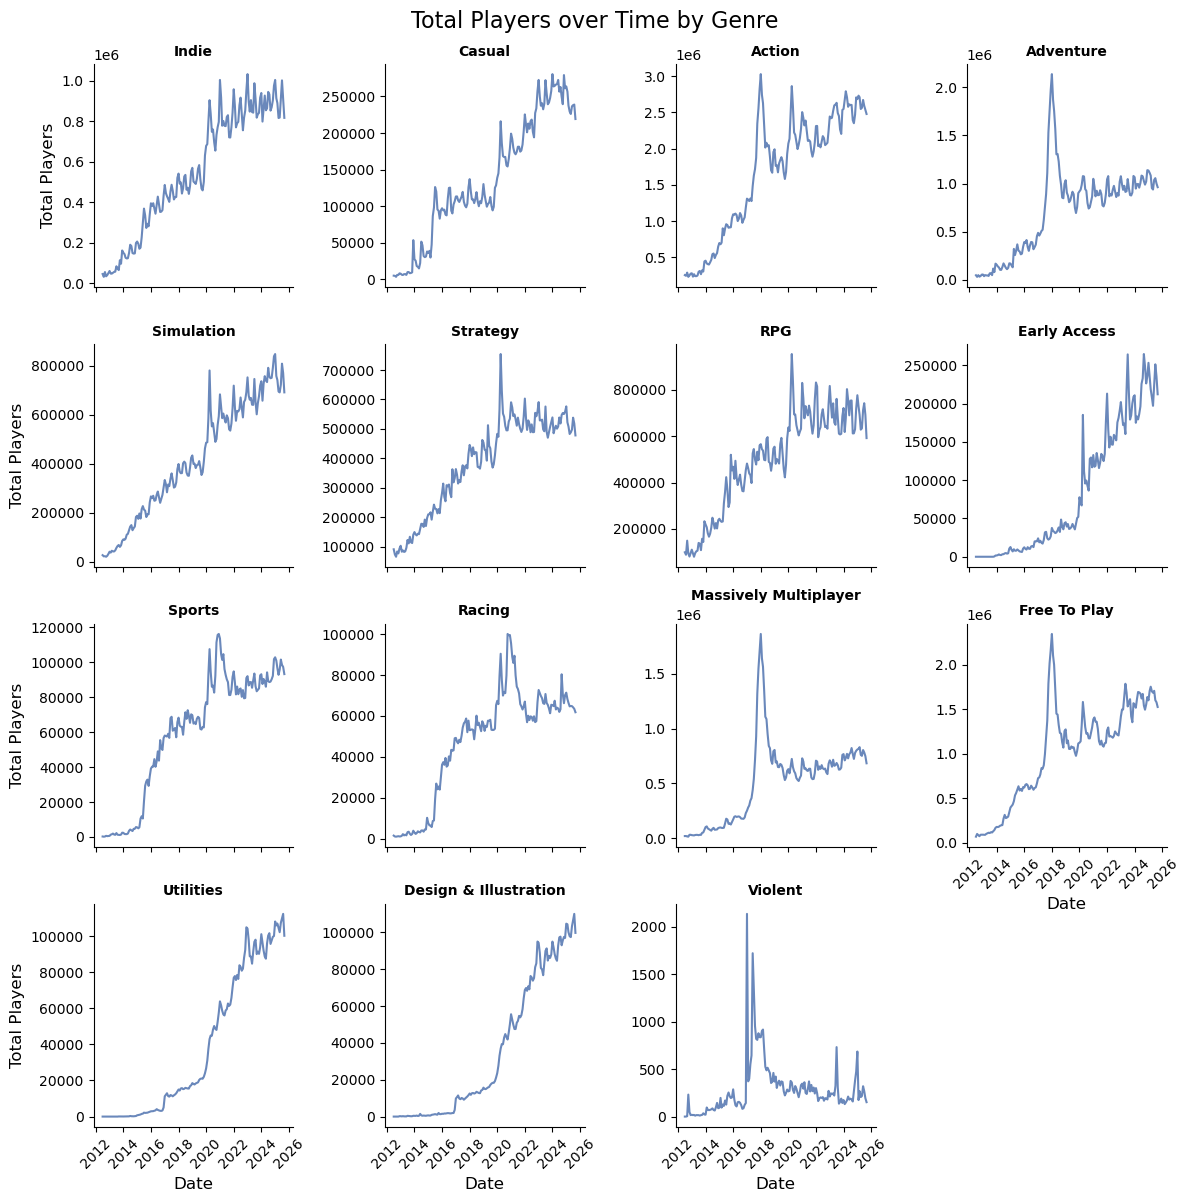

,Month,6 Months,Year,3 Year,5 Year,10 Year
genre,,,,,,
Action,-2.2%,-8.5%,3.6%,20.9%,24.3%,172.3%
Adventure,-3.8%,-11.2%,-6.2%,11.9%,29.9%,225.3%
Casual,-8.3%,-7.7%,-12.2%,12.9%,40.6%,129.6%
Design & Illustration,-9.4%,-0.3%,7.2%,32.6%,130.9%,9414.0%
Early Access,-9.9%,-3.0%,-19.8%,39.6%,145.5%,2952.2%
Free To Play,-3.4%,-13.0%,-1.1%,24.0%,29.9%,159.2%
Indie,-9.8%,-8.2%,-4.2%,8.1%,24.7%,199.3%
Massively Multiplayer,-8.7%,-17.7%,-11.1%,7.5%,28.4%,423.5%
RPG,-14.5%,-14.5%,-3.3%,-7.4%,-5.2%,101.0%


In [25]:
#| echo: false
resetIndex = q1AnalysisData.reset_index()
q1AnalysisDataHasMonthly = resetIndex.loc[resetIndex["index"].isin(monthlyData["steam_appid"].unique())].set_index("index")
q1Data = []
for genre in genresForAnalysisQ1:
    gamesInGenre = q1AnalysisDataHasMonthly.loc[q1AnalysisDataHasMonthly["genres"].apply(lambda x: genre in x)].reset_index()
    gamesWithPlayerData = pd.merge(gamesInGenre, monthlyData, left_on="index", right_on="steam_appid")
    for month in monthlyData["month"].unique():
        totalPlayers = gamesWithPlayerData.loc[gamesWithPlayerData["month"] == month]["avg_players"].sum()
        q1Data.append({
            "genre": genre,
            "month": month,
            "total_players": totalPlayers
        })
plottingData = pd.DataFrame(q1Data)
monthMap = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
def toDate(x):
    split = x.split("-")
    month = monthMap[split[0]]
    year = 2000 + int(split[1])
    return datetime.datetime(year, month, day=1)
plottingData.loc[:,"month"] = plottingData["month"].apply(toDate)
plot = sns.FacetGrid(plottingData, col="genre", col_wrap=4, sharey=False)
plot.map(sns.lineplot, "month", "total_players", color="#6A88BB")
plot.set_axis_labels("Date", "Total Players", fontsize=12)
plot.set_titles("{col_name}", fontweight="bold")
plt.tight_layout()
plot.fig.suptitle("Total Players over Time by Genre", fontsize=16)
plot.fig.subplots_adjust(top=0.935)
for ax in plot.axes.flat:
    ax.tick_params(axis='x', rotation=45)
plt.show()
def gainPastYMonths(x, y):
    if(x.iloc[y, 1]==0):
        return "inf"
    else:
        return round((x.iloc[0, 1] / x.iloc[y, 1] - 1) * 100, 1)
gainPcts = pd.DataFrame()
gainPcts["Month"] = plottingData.groupby("genre").apply(lambda x: gainPastYMonths(x, 1), include_groups=False).astype(str) + "%"
gainPcts["6 Months"] = plottingData.groupby("genre").apply(lambda x: gainPastYMonths(x, 6), include_groups=False).astype(str) + "%"
gainPcts["Year"] = plottingData.groupby("genre").apply(lambda x: gainPastYMonths(x, 12), include_groups=False).astype(str) + "%"
gainPcts["3 Year"] = plottingData.groupby("genre").apply(lambda x: gainPastYMonths(x, 36), include_groups=False).astype(str) + "%"
gainPcts["5 Year"] = plottingData.groupby("genre").apply(lambda x: gainPastYMonths(x, 12*5), include_groups=False).astype(str) + "%"
gainPcts["10 Year"] = plottingData.groupby("genre").apply(lambda x: gainPastYMonths(x, 12*10), include_groups=False).astype(str) + "%"
gainPcts

This data highlights clear trends in how different genres have performed over time. Several genres show strong multi-year momentum. **Simulation**, **Early Access**, **Utilities**, and **Design & Illustration** all show large long-run gains.

- **Design & Illustration** increased +130.9% over 5 years and an extreme +9414% over 10 years, the strongest growth of any genre.
- **Early Access** rised +145.5% over 5 years and +2952% over 10 years.
- **Utilities** grew +106.1% over 5 years and +4671.7% over 10 years.
- **Simulation** increased +41.4% over 5 years and +280.3% over 10 years.

These numbers match the steep upward slopes visible in the visualization. The growth of Early Access is not likely an increase in players' preferece for Early Access games but instead a consequence of more developers releasing Early Access versions of games to increase sales. 

**Action** and **Indie** games are among the most volatile genres. Both frequently swing negative in short windows, with both sitting around -8% for the past 6 months. However, they have strong long term performances:

- **Action**: +24.3% (5 years), +172.3% (10 years)  
- **Indie**: +24.7% (5 years), +199.3% (10 years)  

This makes sense, as these genres often have games that go viral and garner thousands of players before fading out.

Several genres show stagnation or long-term difficulty. **Strategy** and **RPG** are nearly flat or negative across every single horizon shorter than 10 years.

The **Violent** genre is an extreme outlier with consistently poor performances. Its tiny playerbase suggest that Steam’s “Violent” tag is extremely narrow and likely excludes mainstream action titles.

**Racing** is the weakest overall performer. It shows major declines:

- -23.1% (1 year)  
- -22.5% (5 years)  

Racing games, although they had a boom during COVID, have roughly the same number of players today that they had 7–8 years ago, making it the most stagnant genre in the dataset.

##### Figure 2


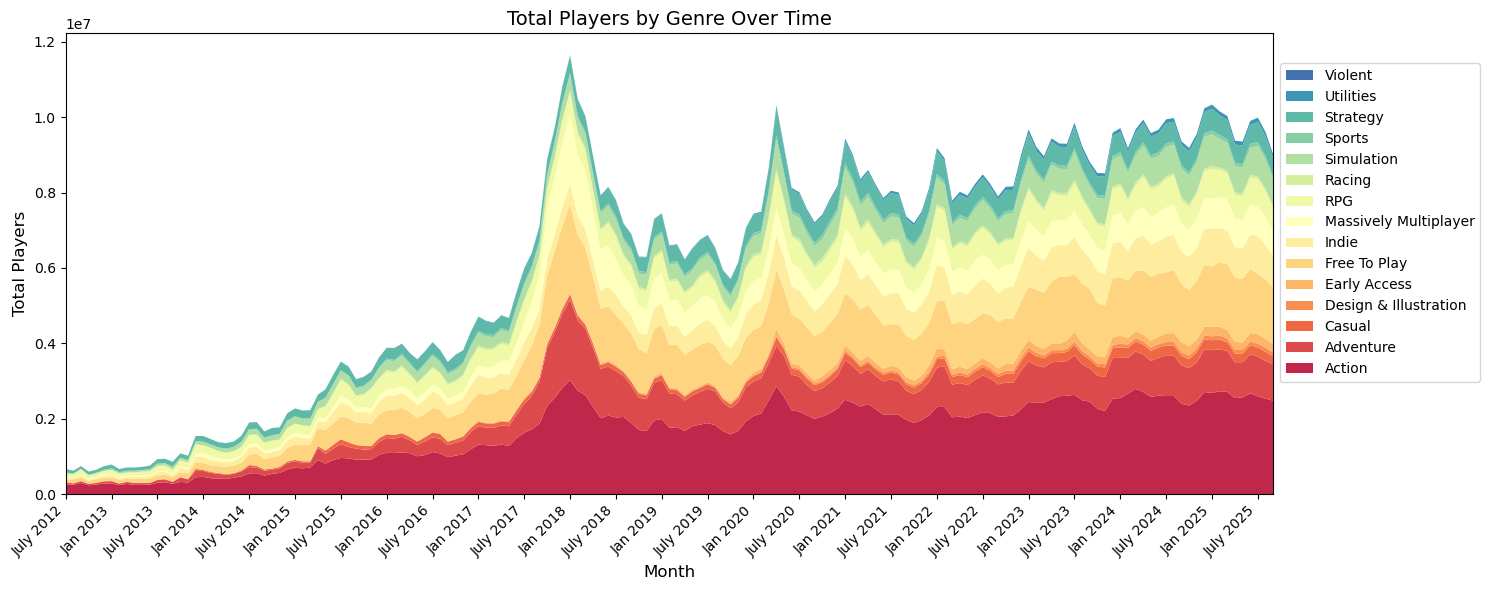

genre,Action,Adventure,Casual,Design & Illustration,Early Access,Free To Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,Utilities,Violent
month,,,,,,,,,,,,,,,
2012-09-01,39.28,6.75,0.45,0.00,0.00,11.85,7.44,2.10,20.13,0.13,2.95,0.03,8.89,0.00,0.00
2013-09-01,31.55,5.87,0.97,0.03,0.00,13.80,7.60,3.48,12.70,0.28,7.91,0.14,15.66,0.01,0.00
2014-09-01,29.59,7.58,1.91,0.03,0.29,16.78,8.94,4.61,12.11,0.21,7.69,0.20,10.05,0.01,0.00
2015-09-01,29.84,9.71,3.13,0.03,0.23,19.30,8.95,4.28,9.66,0.79,5.96,1.04,6.99,0.07,0.01
2016-09-01,27.89,9.10,2.67,0.05,0.36,17.03,10.03,5.07,10.38,1.24,6.84,1.58,7.65,0.09,0.00
2017-09-01,26.32,15.60,1.41,0.14,0.34,19.28,5.81,13.04,6.72,0.80,4.25,0.86,5.24,0.17,0.01
2018-09-01,27.33,14.30,1.45,0.19,0.70,17.76,6.83,11.88,7.02,0.82,5.09,1.05,5.35,0.23,0.01
2019-09-01,28.12,12.65,1.58,0.31,0.60,17.09,7.86,9.65,7.71,0.89,5.95,1.03,6.20,0.35,0.00
2020-09-01,27.65,10.28,2.16,0.60,1.20,16.28,9.08,7.38,8.66,1.11,6.78,1.28,6.87,0.67,0.00


In [28]:
#| echo: false
pivot_data = plottingData.pivot(index='month', columns='genre', values='total_players')
monthDict = {7:"July", 1:"Jan"}
colors = sns.color_palette("Spectral", n_colors=len(pivot_data.columns))
plt.figure(figsize=(15, 6))
plotData = []
for colName in pivot_data.columns:
    plotData.append(pivot_data[colName])
plt.stackplot(range(len(pivot_data)), plotData, 
              labels=pivot_data.columns, colors=colors, alpha=1)
plt.xlim(0, len(pivot_data) - 1)
step = 6  
tick_positions = range(0, len(pivot_data), step)
tick_labels = [f"{monthDict[pivot_data.index[i].month]} {pivot_data.index[i].year}" for i in tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Players', fontsize=12)
plt.title('Total Players by Genre Over Time', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, .95), fontsize=10)
plt.tight_layout()
plt.show()

monthSums = pivot_data.sum(axis=1)
yrs = [f"{yr}-09-01" for yr in range(2012,2026)]
round(pivot_data.div(monthSums, axis=0)*100,2).loc[yrs]

This plot shows two noticeable spikes around Early 2018 and Mid 2020. The 2018 spike corresponds to the release date of PUBG: Battlegrounds, which has genres **Action**, **Adventure**, **Free To Play**, and **Massively Multiplayer**. The 2020 spike is a COVID artifact.

We can also back up the conclusions drawn from Figure 1. **RPG** and **Strategy** used to each make up a double digit percentage of Steam's playerbase, but have since declined to 6 and 5%, respectively.

**Utilities** and **Design & Illustration** have gone from making up 0.00% of the monthly average player count to over 1% each, representing huge gains.  

##### Answer

Based on the data above, if I was a large-scale game developer, I would consider making a game in the **Action** category, with gun-based combat as the central focus of the game. Steam is dominated by PvP Action games, with the majority of games that are in the top 10 of monthly average players being combat games. Action as a genre is the biggest one in gaming, and has shown consistent, stable dominance going back to 2012. 

Also worth considering is the **Simulation** category. While not as big as **Action**, it has had large growth recently and seems poised to continue its growth. In addition, with a total monthly playercount approaching 800,000, it is not a small genre by any means.

The dramatic explosion of players in **Design & Illustration** and **Utilities** may be tempting to a smaller game studio, but both genres are still only at around 1% of the Steam market share. It is hard to justify spending a lot of time and money building a game for such a small audience.

### b) Analysis 2

#### What features are common among the best performing games on Steam?

##### Methodology

My first step was to check if any features in particular correlate well with a games success. Initially, I only looked at numeric variables present in the Games Dataset. I correlated each numeric variable to 3 chosen "success" stats: `peak_ccu` (peak concurrent players), `average_playtime_forever`, and `median_playtime_forever`. The correlation heatmap is plotted in Figure 3.

However, I also wanted to see if any tags of a game would correlate to success. To do this, I merged the cleaned playercount data with the one-hot encoded Game Tags data prepared in 5b. I dropped every column except `peak_ccu` and all of the tags. Peak Concurrent Players is the best way to measure the success of a game since a lot of niches games have dedicated player bases driving up playtime. Afterwards I correlated every variable in the dataset (400+ different tags) with peak playercount. I took the 20 most positively correlated and 20 most negatively correlated tags, to avoid crowding the plot, and displayed them in Figure 4.

To get a better look at only the best-performing Steam Games, I sorted and filtered the clean dataset to only include the top 1000 games by peak playercount. I chose top 1000 because that represents roughly the top 1% of games in the dataset, which is a good goal for a game to reach. Then I grabbed each games top 5 most voted-for tags by the Steam community and aggregated all 1000 games tags into a list before counting the unique occurences of each tag. Since tags are often more specific about a game's content than its genre, this should help us make narrower deductions about what kind of games are popular on Steam than genre alone gave us. The 30 most commonly appearing tags in the top games are displayed in Figure 5.

Lastly, I wanted to find out what kind of tags appear with each other the most among successful games. If developers can identify common successful tag pairs, it would help narrow down features they should put into their games. To do this, I borrowed the dataset made for Figure 3 with peak playercount and one-hot encoded tag information. I sorted and filtered to only have the top 1000 games by max players, and then removed the playercount column so that only the tag information for the top games was left. To find the number of tag co-occurrences I multiplied this matrix by its transpose, creating a 449x449 matrix of total tag co-occurrences in the top 1000 games. For appealing visualization, I filtered out any tags with less than 30 appearances. The top tags were plotted in a heatmap in Figure 6. Underneath the heatmap is a table containing the 15 most co-occurring tags in the games selected, with repeats (tag A and tag B vs tag B and tag A) removed.

##### Figure 3

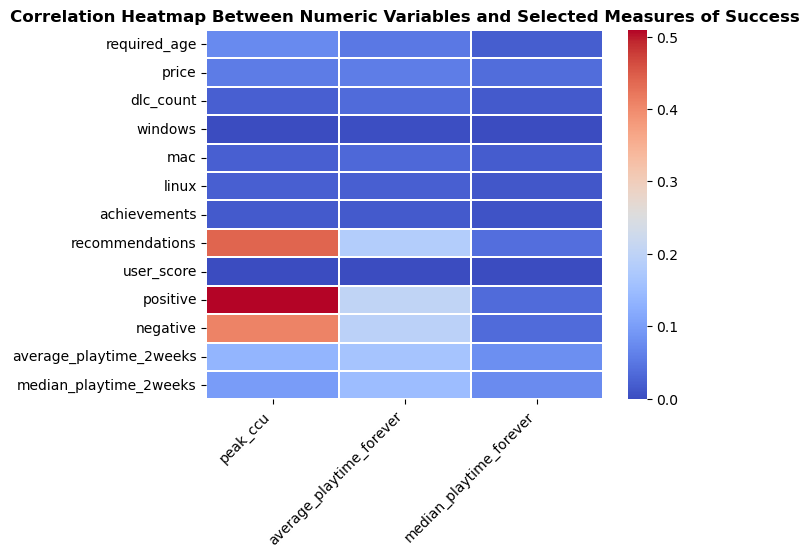

,peak_ccu,average_playtime_forever,median_playtime_forever
required_age,0.073453,0.051255,0.020551
price,0.056024,0.057227,0.038195
dlc_count,0.021401,0.036153,0.015961
windows,0.000839,0.001179,0.000780
mac,0.022686,0.031282,0.017946
linux,0.022171,0.021071,0.011096
achievements,0.015393,0.015543,0.007444
recommendations,0.439511,0.182814,0.040074
user_score,-0.000899,0.000473,0.000595
positive,0.509238,0.204040,0.035680


In [37]:
#| echo: false
corrs = q2AnalysisData.corr(numeric_only=True)[["peak_ccu", "average_playtime_forever", "median_playtime_forever"]]
data = corrs.drop(index=["peak_ccu", "average_playtime_forever", "median_playtime_forever", "ownerUpperBound"])
sns.heatmap(data, cmap="coolwarm", linewidth=0.1)
plt.xticks(rotation=45, ha="right")
plt.title("Correlation Heatmap Between Numeric Variables and Selected Measures of Success", fontweight="bold")
plt.show()
data

`recommendations` is the number of recommendations a game has, `positive` the number of positive reviews, etc. `windows`, `mac`, and `linux` refer to if a game supports that operating system. 

Unsurprisingly, a game's required age or windows support do not say much about how many peak concurrent players it is likely to have. The only metrics that correlate well with success metrics are other metrics of success.

Worthy of note is the mild *positive* correlation between success and price. This is likely because of the abundance of poorly made Free to Play games on Steam.

##### Figure 4

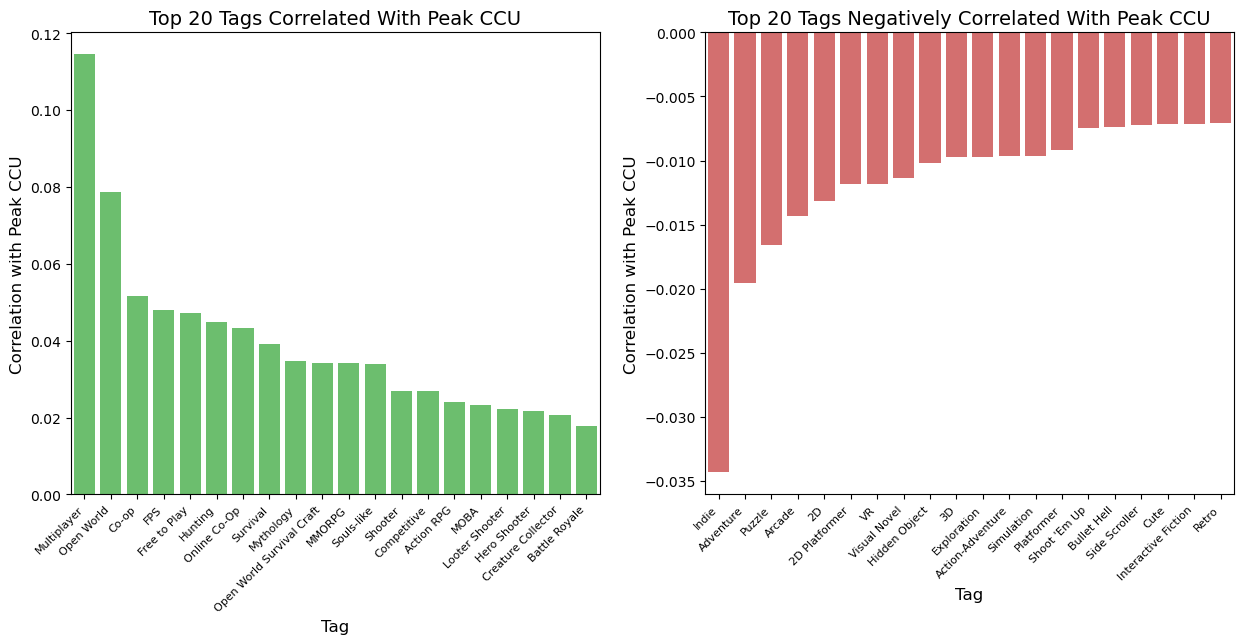

Positive                       Negative          
                        Genre      Corr                Genre      Corr
0                 Multiplayer  0.114464                Indie -0.034362
1                  Open World  0.078566            Adventure -0.019557
2                       Co-op  0.051658               Puzzle -0.016628
3                         FPS  0.047952               Arcade -0.014305
4                Free to Play  0.047323                   2D -0.013125
5                     Hunting  0.044917        2D Platformer -0.011854
6                Online Co-Op  0.043284                   VR -0.011815
7                    Survival  0.039269         Visual Novel -0.011328
8                   Mythology  0.034798        Hidden Object -0.010161
9   Open World Survival Craft  0.034306                   3D -0.009694
10                     MMORPG  0.034282          Exploration -0.009693
11                 Souls-like  0.033993     Action-Adventure -0.009671
12                    Shooter  0.026959           Simulation -0.009612
13                Competitive  0.026925           Platformer -0.009144
14                 Action RPG  0.024048         Shoot 'Em Up -0.007478
15                       MOBA  0.023334          Bullet Hell -0.007391
16             Looter Shooter  0.022294        Side Scroller -0.007230
17               Hero Shooter  0.021828                 Cute -0.007160
18         Creature Collector  0.020661  Interactive Fiction -0.007152
19              Battle Royale  0.017832                Retro -0.007036

In [40]:
#| echo: false
merged = pd.merge(q2AnalysisData.reset_index(),q2GameTags.reset_index(), on="index")
ccuAndTags = merged.iloc[:,28:].drop(columns=["tags","ownerUpperBound"])

plotData = ccuAndTags.corrwith(ccuAndTags["peak_ccu"]).sort_values(ascending=False).iloc[1:21]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(plotData, color = "#5ECC61")
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.xlabel('Tag', fontsize=12)
plt.ylabel('Correlation with Peak CCU', fontsize=12)
plt.title('Top 20 Tags Correlated With Peak CCU', fontsize=14)

plt.subplot(1,2,2)
plotData2 = ccuAndTags.corrwith(ccuAndTags["peak_ccu"]).sort_values(ascending=True).iloc[1:21]
sns.barplot(plotData2, color="#E45E5F")
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.xlabel('Tag', fontsize=12)
plt.ylabel('Correlation with Peak CCU', fontsize=12)
plt.title('Top 20 Tags Negatively Correlated With Peak CCU', fontsize=14)
plt.show()

df = pd.concat([plotData.to_frame().reset_index(),plotData2.to_frame().reset_index()],axis=1)
df.columns = [["Positive", "Positive", "Negative", "Negative"],["Genre", "Corr", "Genre", "Corr"]]
df

It is clear that no tag is a guarantee of success based on these correlations. However, there are a lot of **Multiplayer**-adjacent tags in the top 20 most correlated, such as **Multiplayer**, **Co-op**, **Online Co-op**, and **MMORPG**. This suggests that adding multiplayer features to a game might give it the slightest edge in garnering popularity.

We also see that the theme of gun-based combat games dominating repeats itself here. There are 4 shooter tags in the top 20 most correlated: **FPS**, **Shooter**, **Looter Shooter**, and **Hero Shooter**.

One potential insight that did not appear in the first analysis is the popularity of Survival games, with both **Survival** and **Open World Survival Craft** appearing in the top 20.

On the side of negative correlations, most are very weak. It makes sense that **Indie** is the lowest, however, since Indie games do not have the budget and support of games built by large studios, and therefore are less likely to garner a lot of players.


##### Figure 5

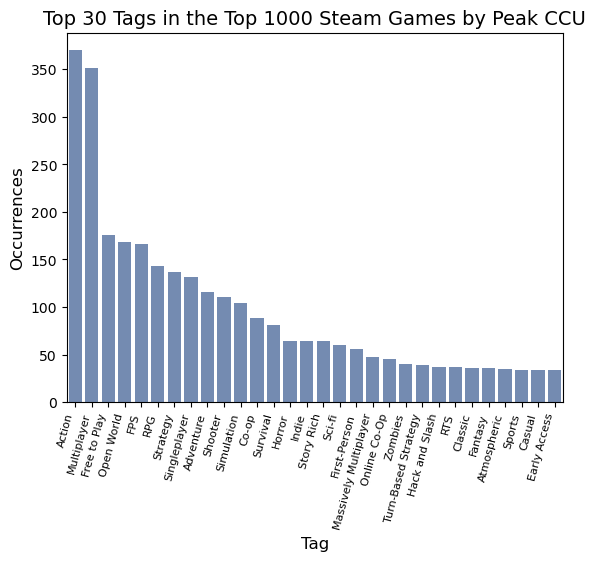

,count
tags,
Action,370
Multiplayer,351
Free to Play,176
Open World,168
FPS,166
RPG,143
Strategy,137
Singleplayer,132
Adventure,116


In [43]:
#| echo: false
sorted = q2AnalysisData.sort_values("peak_ccu", ascending=False)
def getTopTags(x):
    if(len(x)==0):
        return []
    else:
        return list(x.keys())[:5]

data = sorted["tags"].iloc[:1000].apply(getTopTags).explode().value_counts()

sns.barplot(data.iloc[:30], color="#6A88BB")
plt.xticks(rotation=75, fontsize=8, ha='right')
plt.xlabel('Tag', fontsize=12)
plt.ylabel('Occurrences', fontsize=12)
plt.title('Top 30 Tags in the Top 1000 Steam Games by Peak CCU', fontsize=14)
plt.show()

pd.DataFrame(data.iloc[:30])

The top 30 tags back up some of the correlations seen in Figure 4. **Multiplayer**, **Shooter**, and **Survival** games are among the most popular type of game in Steam's top 1000 games by playercount.

The line plots from Figure 1 revealed that **RPG** and **Strategy** were among the more stagnant genres, but here we can see they still command sizeable percentages of Steam's top 1000 games, at 14.3% and 13.7%, respectively.

Because of the sheer volume of **Indie** games available, it makes sense that there are 64 in the top 1000.

Interestingly, **Simulation** games have almost as many appearances as **Shooter** games. Based on the growth seen in Figure 1, it might be the case that **Simulation** climbs into the top 5 of this list within the next few years.

##### Figure 6

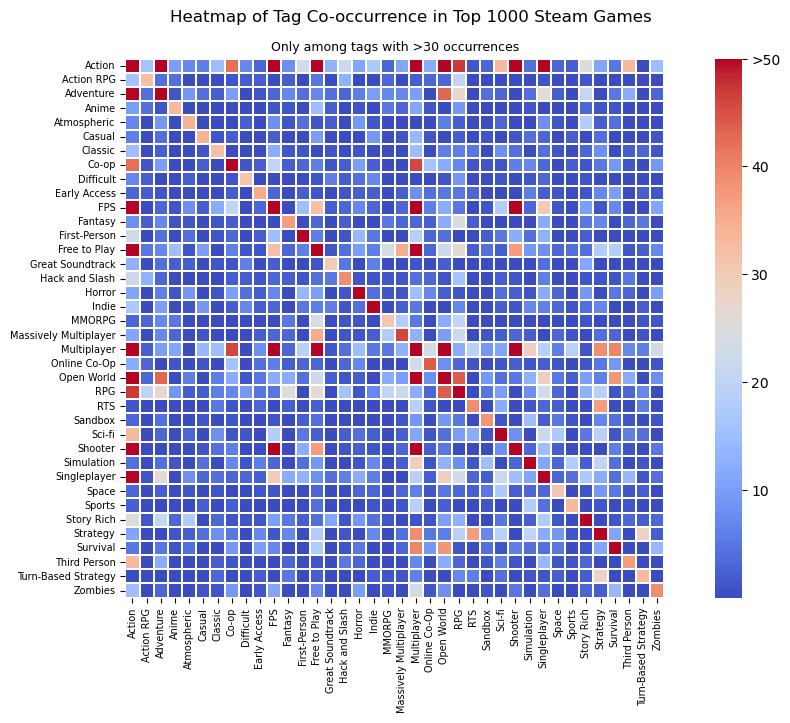

,Tag 1,Tag 2,Occurrences
20,Multiplayer,Action,148
10,FPS,Action,114
514,Multiplayer,Free to Play,110
400,Multiplayer,FPS,96
1036,FPS,Shooter,86
787,Shooter,Multiplayer,81
1026,Action,Shooter,79
22,Open World,Action,72
29,Singleplayer,Action,67
76,Action,Adventure,61


In [46]:
sorted = ccuAndTags.sort_values("peak_ccu", ascending=False)
top50 =sorted.iloc[:1000, 1:].astype(int)
occur = top50.T.dot(top50)
maxOccurs = occur.max()
smalltags = list(maxOccurs.loc[maxOccurs<30].index)
data = occur.drop(index=smalltags, columns=smalltags)
plt.figure(figsize=(13,7))
a = sns.heatmap(data, vmin=0, vmax=50, cmap="coolwarm", square=True, linewidths=.01)
gradient = a.collections[0].colorbar
gradient.set_ticks([10,20,30,40,50])
gradient.set_ticklabels([10,20,30,40,">50"])
plt.xticks(ticks=np.arange(len(data.columns))+0.5, labels=data.columns, fontsize=7)
plt.yticks(ticks=np.arange(len(data.index))+0.5, labels=data.index, fontsize=7)
plt.title("Only among tags with >30 occurrences",fontsize=9)
plt.suptitle("Heatmap of Tag Co-occurrence in Top 1000 Steam Games", ha="center", x=0.55, y=.95)
plt.show()
sorted = data.reset_index().melt(id_vars="index").sort_values("value", ascending=False)
sorted.loc[(sorted["index"] != sorted["variable"])].head(30).iloc[::2].rename(columns={"index":"Tag 1", "variable":"Tag 2", "value":"Occurrences"})

Co-occurrence counts how often both tags appear in the same game, not how similar the tags are.

Once again, **Action** dominates, appearing in 8 of the top 15 tag co-occurrences. These co-occurrences indicate that the most successful games share a common cluster of tags: **Action**, **Multiplayer**, **Free-to-Play**, **FPS**, **Shooter** games. These 5 tags describe the most popular games on Steam's platform, such as Counter-Strike and PUBG. 

Looking at some of the less popular tags, we can identify some interesting trends from the heatmap. **Simulation** games often are also **Multiplayer** or **Strategy** games, but not **Action** or **FPS** (First Person Shooter).

Popular **Survival** games typically have **Multiplayer** and **Open World** features. 

**Horror** games do not have a lot of co-occurrences with any other popular tag. This suggests that the Horror genre is less reliant on broad tags like Action or Shooter, and has more diversity of game type.

##### Answer

Across all analyses, the most common tags in the top 1000 games, the strongest correlations with peak playercount, and the top tag co-occurrences, a clear pattern emerges. The dominant profile of a highly popular Steam game centers on **Action**, **Multiplayer**, **Free to Play**, and **FPS/Shooter** elements. These tags appear both frequently (Action = 370/1000 games, Multiplayer = 351/1000) and with strong positive correlations. This combination describes many of Steam’s most successful games, such as Counter-Strike and PUBG.

A second set of popular features involves **Open World**, **Survival**, and **Adventure**. These appear in the top correlated tags (Open World, Survival, Open World Survival Craft) and also rank highly in total frequency among successful games. This trend reflects the growing appeal of large, explorable environments.

Some other popular features that do not fit into any set archetype of game are **Co-op**, **Horror**, and **Story-Rich**. 

### c) Analysis 3 

#### How does success vary within different genres?

##### Methodology

To start, I used the same genres from Analysis 1, only the ones with enough games within them to give meaningful insights, and the cleaned data prepared in Cleaning 3. For each genre, I found each game that had that genre, and then extracted four statistics: `average_playtime_forever`, `peak_ccu`, `positive` (total number of positive reviews), and a new variable, the percent of reviews that were positive, taken by dividing the positive column by the sum of `positive` and `negative`. 

After all the data was gathered for each genre, I created a 2x2 grid of boxplots with each genre having their own entries in each plot. Each boxplot represented one of the statistics extracted from the process above. The plot is in Figure 7, with mean and quartile stats in tabular form underneath.

To get a closer look at what kinds of features are popular within in each genre, I grouped the games dataset by genre and sorted it by descending `peak_ccu`. For each genre, I took the top 300 games by peak playercount and found how many times each tag appears in the most popular titles. I chose the top 300 in each genre to make sure that there was enough data for significant results as well as get a look at a distribution of successful games, not just the top few. In Figure 8, the top 15 most commonly appearing tags within the most popular games of each genre are presented, with some of the results in a table below. The idea behind this is to look at which tags, and therefore which features or aspects of a game, tend to do well within each genre. This allows us to make very particular claims about what is popular in a given genre.

##### Figure 7

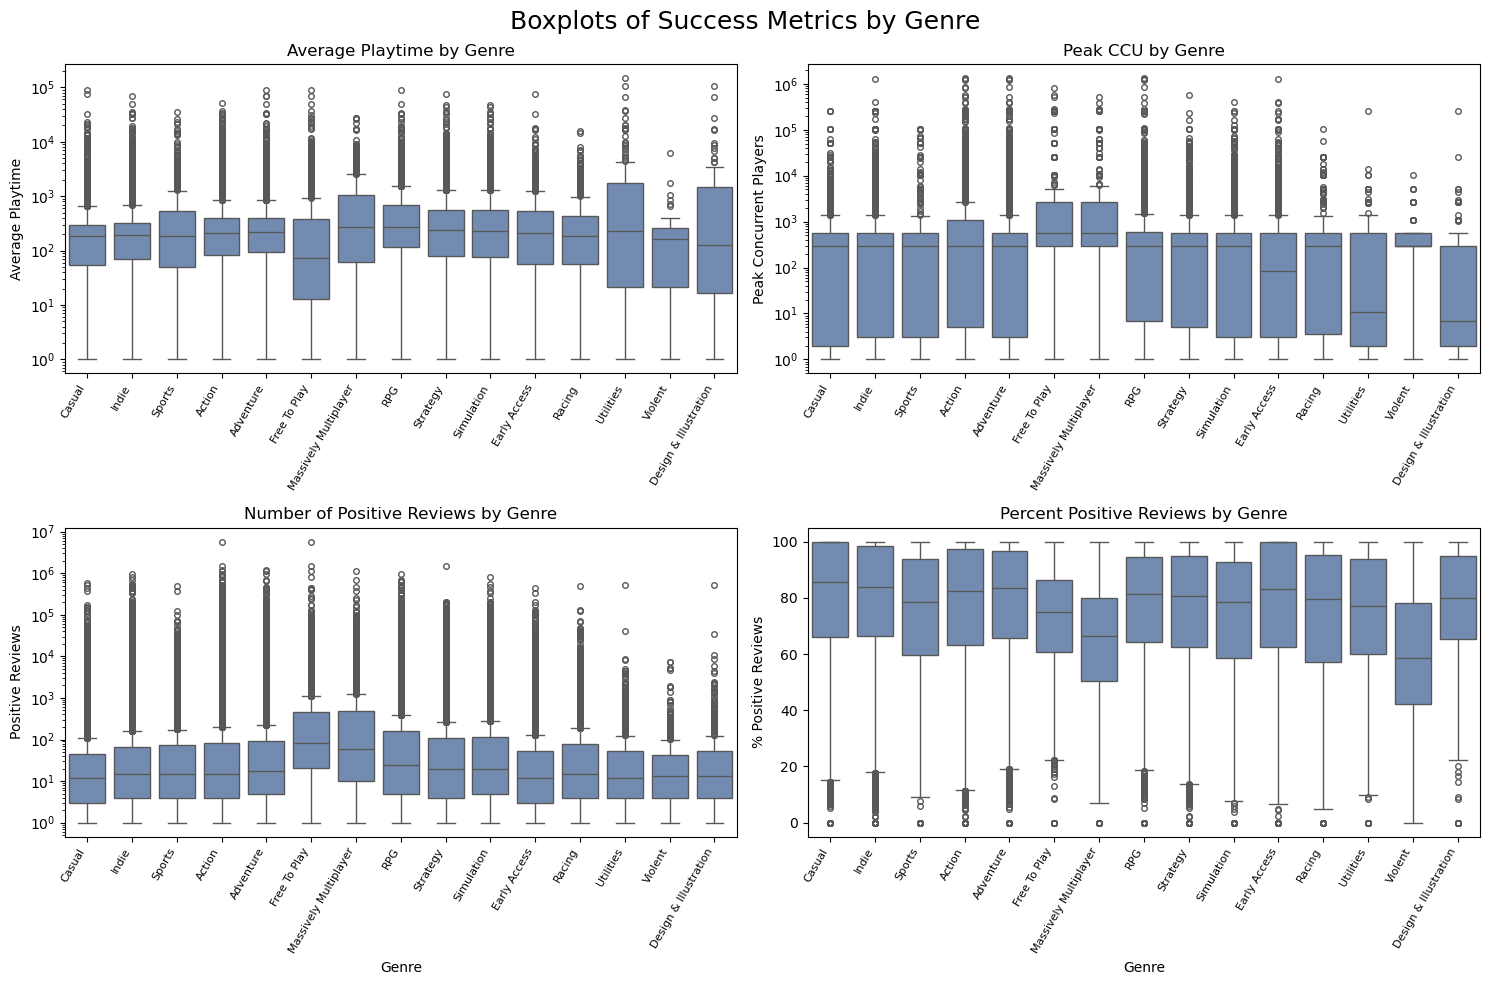

Average Playtime                         \
                                  mean    25%    50%      75%   
genre                                                           
Action                           513.2   83.0  212.0    394.0   
Adventure                       523.16   93.0  221.0    389.0   
Casual                          422.93   55.0  187.0    298.0   
Design & Illustration          3720.15  16.75  127.0  1499.75   
Early Access                     672.5   57.0  210.0    522.5   
Free To Play                    942.62   13.0   73.0    377.0   
Indie                           395.71   71.0  197.0    322.0   
Massively Multiplayer          1169.95   61.0  271.0   1045.0   
RPG                             774.09  114.0  274.0    673.0   
Racing                          560.44   55.5  186.0    429.5   
Simulation                      738.37   75.0  227.5   563.25   
Sports                          915.33   49.0  182.0    539.0   
Strategy                        707.88   81.0  242.0    564.5   
Utilities                      4797.67   21.0  228.0   1715.0   
Violent                         233.61  21.25  166.5   264.75   

                      Peak Concurrent Players                           \
                                         mean     25%     50%      75%   
genre                                                                    
Action                                3110.74    5.00  297.92  1073.66   
Adventure                             1952.16    3.00  297.92   556.50   
Casual                                 755.74    2.00  297.92   556.50   
Design & Illustration                 1560.47    2.00    7.00   297.92   
Early Access                          1712.58    3.00   85.00   556.50   
Free To Play                          4833.21  297.92  556.50  2625.12   
Indie                                 1121.33    3.00  297.92   556.50   
Massively Multiplayer                 6266.79  297.92  556.50  2625.12   
RPG                                   2690.88    7.00  297.92   597.00   
Racing                                1226.84    3.50  297.92   556.50   
Simulation                            1530.61    3.00  297.92   556.50   
Sports                                1772.63    3.00  297.92   556.50   
Strategy                              1416.84    5.00  297.92   556.50   
Utilities                             1279.52    2.00   11.00   556.50   
Violent                                857.00  297.92  297.92   556.50   

                      Percent Positive Reviews                       \
                                          mean    25%    50%    75%   
genre                                                                 
Action                                   75.58  63.04  82.36  97.46   
Adventure                                76.52  65.62  83.33  96.66   
Casual                                   77.23  65.94   85.5  100.0   
Design & Illustration                    75.29  65.38   80.0  94.74   
Early Access                             75.35  62.34  83.15  100.0   
Free To Play                             72.65  60.77   75.0  86.36   
Indie                                    76.88  66.25  83.77  98.51   
Massively Multiplayer                    64.08  50.41  66.28  79.88   
RPG                                      75.44   64.1  81.25  94.38   
Racing                                   72.45  57.18  79.55  95.24   
Simulation                               72.24  58.58  78.36  92.61   
Sports                                   72.27  59.68  78.51  93.69   
Strategy                                 74.66   62.5  80.49   95.0   
Utilities                                72.65   60.0  77.07  93.68   
Violent                                  58.41  42.13  58.64  78.21   

                      Number of Positive Reviews                     
                                            mean   25%   50%    75%  
genre                                                                
Action                       

In [55]:
#| echo: false
q3AnalysisData.loc[:, "genres"] = q1AnalysisData.loc[q3AnalysisData.index, "genres"]

genresToUse = ['Casual', 'Indie', 'Sports', 'Action', 'Adventure', 'Free To Play',
               'Massively Multiplayer', 'RPG', 'Strategy', 'Simulation',
               'Early Access', 'Racing', 'Utilities', 'Violent', 'Design & Illustration']
gameGenres = q3AnalysisData["genres"].explode()
plottingData = []
plottingData2 = []
plottingData3 = []
plottingData4 = []
for genre in genresToUse:
    gamesInGenre = gameGenres.loc[gameGenres == genre].index
    playdata = q3AnalysisData.loc[gamesInGenre, "average_playtime_forever"]
    plottingData.append(pd.DataFrame({"genre": genre, "data": playdata[playdata!=0]}))
    ccuData = q3AnalysisData.loc[gamesInGenre, "peak_ccu"]
    plottingData2.append(pd.DataFrame({"genre": genre, "data": ccuData[ccuData!=0]}))
    pos = q3AnalysisData.loc[gamesInGenre, "positive"]
    neg = q3AnalysisData.loc[gamesInGenre, "negative"]
    total = pos + neg
    flags = total == 0
    total = total.loc[~flags]
    pos = pos.loc[~flags]
    revData = pos / total * 100
    plottingData3.append(pd.DataFrame({"genre": genre, "data": revData}))
    posData = q3AnalysisData.loc[gamesInGenre, "positive"]
    plottingData4.append(pd.DataFrame({"genre": genre, "data": posData[posData!=0]}))

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plottingData = pd.concat(plottingData)
sns.boxplot(plottingData, x="genre", y="data", color="#6A88BB", fliersize=4)
plt.yscale("log")
plt.ylabel("Average Playtime")
plt.xlabel(None)
plt.title("Average Playtime by Genre")
plt.xticks(rotation=60, fontsize=8, ha="right")

plt.subplot(2,2,2)
plottingData2 = pd.concat(plottingData2)
sns.boxplot(plottingData2, x="genre", y="data", color="#6A88BB", fliersize=4)
plt.yscale("log")
plt.ylabel("Peak Concurrent Players")
plt.xlabel(None)
plt.title("Peak CCU by Genre")
plt.xticks(rotation=60, fontsize=8, ha="right")

plt.subplot(2,2,3)
plottingData4 = pd.concat(plottingData4)
sns.boxplot(plottingData4, x="genre", y="data", color="#6A88BB", fliersize=4)
plt.yscale("log")
plt.ylabel("Positive Reviews")
plt.xlabel("Genre")
plt.title("Number of Positive Reviews by Genre")
plt.xticks(rotation=60, fontsize=8, ha="right")

plt.subplot(2,2,4)
plottingData3 = pd.concat(plottingData3)
sns.boxplot(plottingData3, x="genre", y="data", color="#6A88BB", fliersize=4)
plt.ylabel("% Positive Reviews")
plt.xlabel("Genre")
plt.title("Percent Positive Reviews by Genre")
plt.xticks(rotation=60, fontsize=8, ha="right")

plt.suptitle("Boxplots of Success Metrics by Genre", fontsize=18)
plt.tight_layout()
plt.show()

datas = [plottingData, plottingData2, plottingData3, plottingData4]
vals = ["Average Playtime", "Peak Concurrent Players", "Percent Positive Reviews", "Number of Positive Reviews"]
dfs = []
stats = ["mean", "25%", "50%", "75%"]
for i,d in enumerate(datas):
    desc = d.groupby("genre").describe()
    desc.columns = desc.columns.droplevel(0)
    desc.columns = pd.MultiIndex.from_product([[vals[i]], desc.columns])
    dfs.append(desc.loc[:, (vals[i], stats)])  
round(pd.concat(dfs, axis=1),2)

**Massively Multiplayer** and **RPG** games lead in Average Playtime. On the other hand, it makes sense for **Free to Play** games to have the lowest median Average Playtime, since gamers are less likely to feel the need to finish or spend time on a game they did not pay for.

Examining Peak Concurrent Players, **Massively Multiplayer** maintains the highest median, now accompanied by **Free to Play**. Games in the **Free to Play** category benefit from the absence of a price barrier, increasing accessibility and attracting larger audiences. In contrast, **Design & Illustration** and **Utilities** exhibit substantially lower median peak concurrent players. This aligns with expectations, as most applications in these genres, such as illustration tools or wallpaper apps, are not multiplayer, and therefore users do not engage simultaneously with others.

Looking at the number of Positive Reviews, **Free To Play** and **Massively Multiplayer** games dominate, with medians of 462 and 492 positive reviews, respectively. These genres tend to attract larger player bases, which naturally results in more reviews. Smaller or niche genres such as **Violent** and **Design & Illustration** have far fewer positive reviews, consistent with their smaller audiences.

Lastly, in Percent Positive Reviews, most genres exhibit high median approval, generally above 70%. **Adventure**, **Action**, **Indie**, and **Casual** games show particularly strong reception, with medians around 80%. In contrast, **Massively Multiplayer** games have a lower median of roughly 66%, likely reflecting the huge variance in player experiences in games within the genre.


##### Figure 8

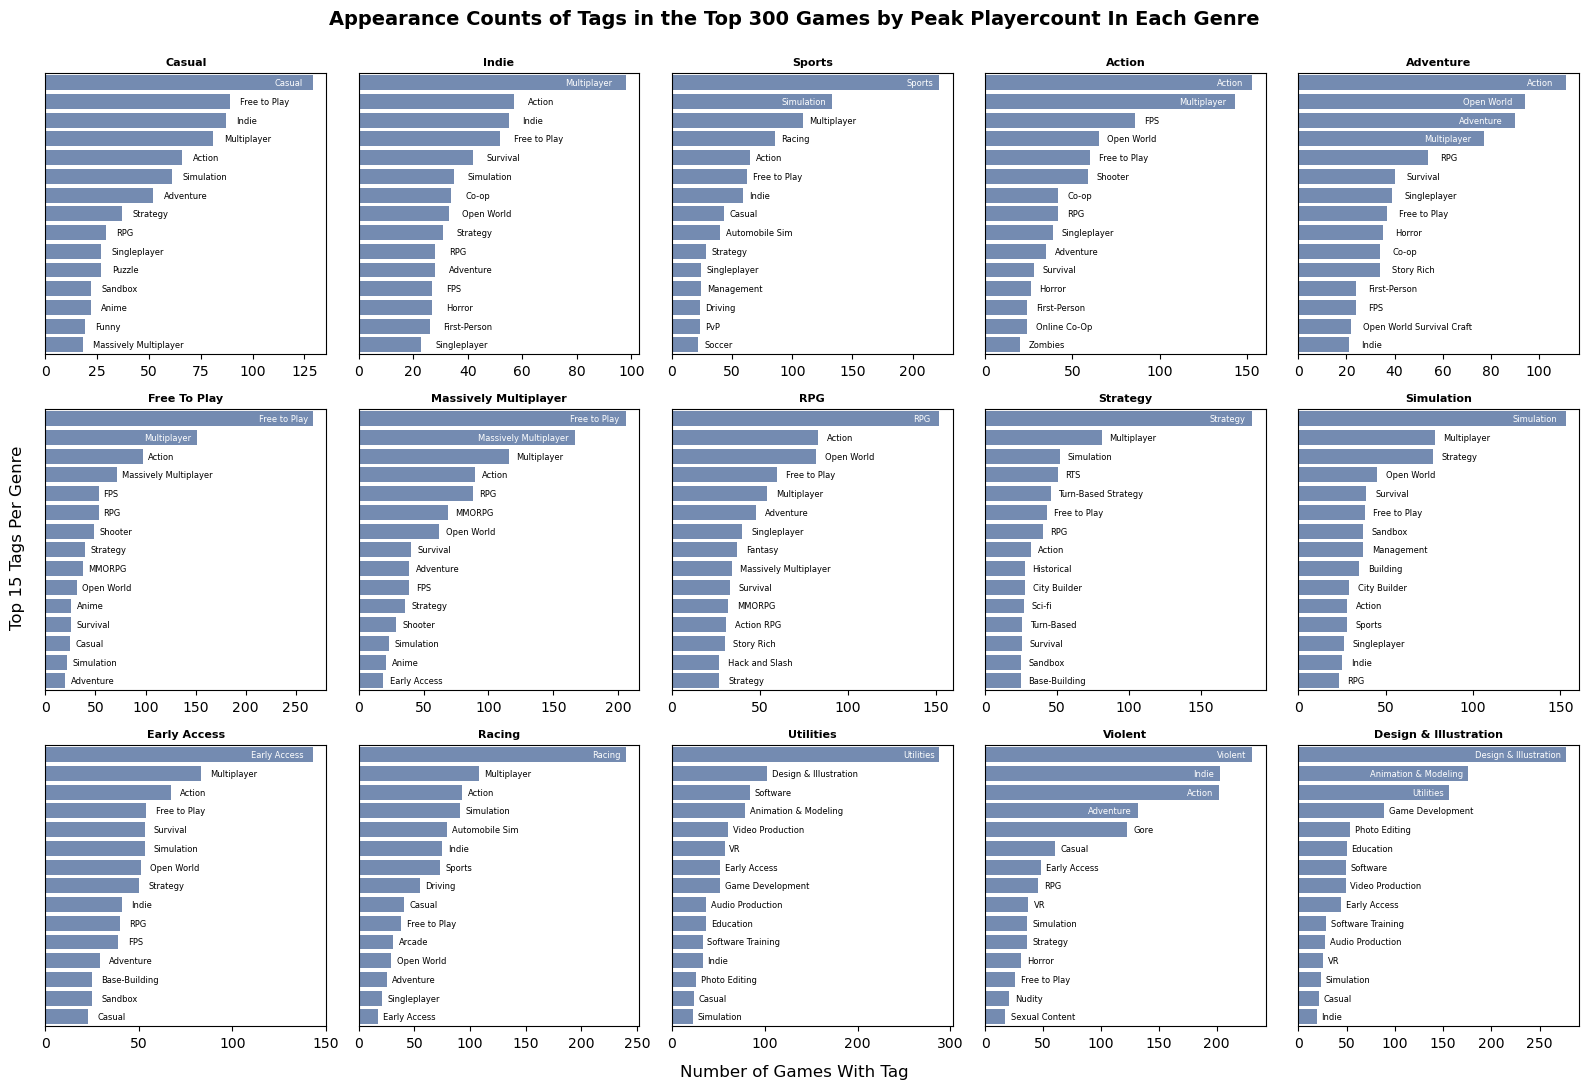

Casual               Indie                Sports        \
                     tags count          tags count            tags count   
0                  Casual   129   Multiplayer    98          Sports   222   
1            Free to Play    89        Action    57      Simulation   133   
2                   Indie    87         Indie    55     Multiplayer   109   
3             Multiplayer    81  Free to Play    52          Racing    86   
4                  Action    66      Survival    42          Action    65   
5              Simulation    61    Simulation    35    Free to Play    62   
6               Adventure    52         Co-op    34           Indie    59   
7                Strategy    37    Open World    33          Casual    43   
8                     RPG    29      Strategy    31  Automobile Sim    40   
9            Singleplayer    27           RPG    28        Strategy    28   
10                 Puzzle    27     Adventure    28    Singleplayer    24   
11                Sandbox    22           FPS    27      Management    24   
12                  Anime    22        Horror    27         Driving    23   
13                  Funny    19  First-Person    26             PvP    23   
14  Massively Multiplayer    18  Singleplayer    23          Soccer    22   

          Action                        Adventure        ...   Early Access  \
            tags count                       tags count  ...           tags   
0         Action   153                     Action   111  ...   Early Access   
1    Multiplayer   143                 Open World    94  ...    Multiplayer   
2            FPS    86                  Adventure    90  ...         Action   
3     Open World    65                Multiplayer    77  ...   Free to Play   
4   Free to Play    60                        RPG    54  ...       Survival   
5        Shooter    59                   Survival    40  ...     Simulation   
6          Co-op    42               Singleplayer    39  ...     Open World   
7            RPG    42               Free to Play    37  ...       Strategy   
8   Singleplayer    39                     Horror    35  ...          Indie   
9      Adventure    35                      Co-op    34  ...            RPG   
10      Survival    28                 Story Rich    34  ...            FPS   
11        Horror    26               First-Person    24  ...      Adventure   
12  First-Person    24                        FPS    24  ...  Base-Building   
13  Online Co-Op    24  Open World Survival Craft    22  ...        Sandbox   
14       Zombies    20                      Indie    21  ...         Casual   

                  Racing                    Utilities               Violent  \
   count            tags count                   tags count            tags   
0    143          Racing   240              Utilities   288         Violent   
1     83     Multiplayer   108  Design & Illustration   103           Indie   
2     67          Action    93               Software    84          Action   
3     54      Simulation    91   Animation & Modeling    79       Adventure   
4     53  Automobile Sim    79       Video Production    61            Gore   
5     53           Indie    75                     VR    57          Casual   
6     51          Sports    73           Early Access    52    Early Access   
7     50         Driving    55       Game Development    52             RPG   
8     41          Casual    41       Audio Production    37              VR   
9     40    Free to Play    38              Education    37      Simulation   
10    39          Arcade    31      Software Training    33        Strategy   
11    29      Open World    29                  Indie    33          Horror   
12    25       Adventure    25          Photo Editing    26    Free to Play   
13    25    Singleplayer    21                 Casual    24          Nudity   
14    23    Early Access    17             Simulation    23  Sexual Content   

          Design & Il

In [58]:
#| echo: false
def getTopTags(x):
    if(len(x)==0):
        return []
    else:
        return list(x.keys())[:5]

data = dict()
for genre in genresToUse:
    gamesInGenre = gameGenres.loc[gameGenres == genre].index
    sortedGames = q3AnalysisData.loc[gamesInGenre].sort_values(by="peak_ccu", ascending=False).iloc[:300]
    data[genre] = sortedGames.loc[:, "tags"].apply(getTopTags).explode().value_counts().iloc[:15]

plt.figure(figsize=(16,11))
for i in range(len(genresToUse)):
    plt.subplot(3,5,i+1)
    curData = data[genresToUse[i]]
    tags = curData.index
    counts = curData.values
    maxcount = max(counts)
    sns.barplot(x=counts, y=tags, color="#6A88BB")
    for j, (count, tag) in enumerate(zip(counts, tags)):
        if(count<125):
            if(maxcount<125 and count>60):
                plt.text(count - 5, j, tag, va='center', ha="right", fontsize=6, color="white")
            else:
                plt.text(count + 5, j, tag, va='center', fontsize=6)
        else:
            plt.text(count - 5, j, tag, va='center', ha="right", fontsize=6, color="white")

    plt.yticks([]) 
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(genresToUse[i], fontsize=8, fontweight="bold")
plt.tight_layout(rect=[.02, .02, 1, 0.95])
plt.suptitle("Appearance Counts of Tags in the Top 300 Games by Peak Playercount In Each Genre", fontsize=14, fontweight="bold")
plt.figtext(0.5, 0.01, "Number of Games With Tag", ha='center', fontsize=12)
plt.figtext(0.01, 0.5, "Top 15 Tags Per Genre", va='center', rotation='vertical', fontsize=12)
plt.show()
dfs = []
for g in genresToUse:
    d = pd.DataFrame(data[g]).reset_index()
    d.columns = [[g,g], d.columns]
    dfs.append(d)
pd.concat(dfs,axis=1)

The top tags of **Action** and **Free to Play** reveal the Multiplayer Shooter archetype of game uncovered in previous analysis.

One insight this plot has that previous ones do not is the intersection of popular tags in the **Simulation** and **Strategy** genres. Both have Simulation, Multiplayer, and Strategy as their top 3 tags, and City Builder and Sandbox tags lower down their lists. This suggests another popular archetype of popular game that aligns with well known titles such as The Sims and Roller Coaster Tycoon.

The heavy overlap between the popular tags of **Utilities** and **Design & Illustration** suggest that they share a lot of games. This makes sense, as games such as Blender, which is a multi-purpose animation and modeling app, fit into both genres.

There is also a lot of tag-sharing between the **Massively Multiplayer** and **RPG** genres. A lot of popular titles fit into both genres, such as Final Fantasy and EVE Online.

##### Answer

Each genre has vastly different standards for success depending on which metrics are being explored. 

Successful **Massively Multiplayer** games tend to be Open World RPGs, and they tend to have far more average playtime and peak players than other games. On the other hand, they often struggle to garner more than 80% positive reviews.

**Casual** and **Indie** games do not tend to draw players in for a long time nor do they have large playerbases, but they have among the highest percentages of positive reviews in the industry. In addition, they have a more even spread of tags across their popular titles, suggesting that consumers looking for Casual and Indie games are less likely to look for a specific archetype of game.

The most popular **Utilities** and **Design & Illustration** apps focus on Animation, Modeling, and Photo/Video Development. They do not tend to have the eye-popping playercounts that other genres do, but can have dedicated fans who put more hours into their games than fans of other genres.

## 7) Recommendations to Stakeholders


### a) Recommendations 1

For studios looking to develop the next hit game, I would focus on making an **Action** or **Simulation** game. Action games have dominated Steam's player counts as far back as the data goes, with the most popular games on the platform consistently being Action-based PvP Shooters. The biggest games in the Action genre are household titles like Counter-Strike and PUBG, and any studio looking to capture some of the massive Action market should follow their lead. Simulation games have been on a recent tear, with games like Farming Simulator, EA FC, and Football Manager garnering hundreds of thousands of players. There seems to be a growth in the number of players who enjoy playing management-style games where they get to put themselves in a unique and enjoyable environment. Otherwise, my recommendation is to stay away from **RPG** and **Simulation** games. They have had stagnant playercounts and represent a shrinking share of Steam's total playercount, so releasing a game in either of those genres may be more difficult.

The primary limitation of this analysis is that the success of a genre is driven by the success of its top few games. A few recent releases of huge budget **Action** games, like Counter-Strike or Elden Ring, may inflate overall player counts and make it look like **Action** as a whole is doing well without giving us a look at the typical Action game. There is no guarantee that releasing a similar game will capture any of the market that the most popular games have.

To overcome this, it may be more helpful to study the distribution of average players in each genre, and how it has shifted over time. This way, it is possible to see what percentage of a genre's player base is made up of its top few games. A genre that is growing more "organically", that is, not relying on a few popular games to make up its player count, may show increased median average monthly player counts across games in the genre. It may also be helpful to find a better system of identifying a game's genres than Steam's built in labels. Often, games with any aspect of a genre, even if it is a small part of the game, get labeled as being in that genre. This makes Steam's genres not the most accurate way of determining the type and style of a game.

### b) Recommendations 2

Developers who are looking to add features into their game that increases the chance of success should be trying to add as many Multiplayer aspects as possible. Multiplayer consistently shows up as the most correlated tag to peak playercount, the second most common tag in the top 1000 games, and makes up 3 of the 4 most popular tag pairs among popular games. It is clear that gamers want to be able to spend time with other players in game, and developers should lean into this as much as possible. 

I also recommend that developers of Action Shooter games should be making their games Free-to-Play. The most popular shooters are overwhelmingly free, and trying to convince consumers to pay for a game in a market saturated by successful free games is a tough proposition. These games are able to make money through in-game sales after the player has already downloaded.

My last suggestion for developers is to incorporate more Open World maps into their games. Similarly to Multiplayer features, Open World appears as one of the most correlated to peak playercount, and is a very common tag amongst the most successful games on Steam. 

The biggest constraint to using game tags to analyze successful features of games is that tags are often not specific enough to analyze the features of a game. It might be the case that Open World games are becoming more popular because of increased adoption of teleport mechanics to traverse the map, but there is no "teleportation" tag that would identify that. Similarly, multiplayer games come in many forms. Should players work together as a team or solo against each other? Should they face off against other players or bots? Figuring out which type of multiplayer game tends to be more successful is difficult going off of tag data alone.

Looking deeper into the tags category might help gain insight into Multiplayer games, as PvP and Teamwork are both tags on Steam. But in order to get answers about specific features like teleportation, nothing short of a deep dive into each successful game within a category of interest and noting their features will give insight into the attributes that make games popular.

### c) Recommendations 3 

Steam should carefully consider which games to feature on their home page by analyzing how that game is performing relative to its genre. If you only display games based on the number of players they have, the home page will be dominated by **Free to Play** and **Action** games, which ignores consumers who prefer niche genres. Break down home page displays by category, and use different metrics than player count to help steer players towards games that could become successful. For example, in the **Massively Multiplayer** category, which typically has low percentages of positive reviews, games with large shares of positive reviews should be featured. The low median percentage of positive reviews in the genre might imply players are unsatisfied with the current selection of games, and by recommending games with higher percent positive reviews could help grow the genre. Similarly, **Casual** and **Indie** games tend to have low average playtime, so by featuring games in those genres with high playtime, Steam may be able to capture more customers.

For developers, careful consideration should be given to the most popular tags of the genre they are developing a game in. Typical **Utilities** and **Design & Illustration** titles focus on Animation, Modeling, and Illustration. Trying to develop a Utilities app for Steam that does not fit into one of these subcategories might not be the best idea. If someone is interested in building a **Strategy** game, they should consider making it as a Sci-fi, City Builder, or Historical game as well, since those tags have done well and already have established player bases who may try their game out.

Some limitations of these conclusions are the lack of good success metrics in the Steam Games dataset. Peak Concurrent Players is a good way to measure a games' popularity, but companies care about making money, not having a lot of consumers. While there is price data and rough estimates of the number of people who own each game, the range of potential owners each game could have is too big to make claims from. Additionally, games on Steam go on sale very often, so simply multiplying price by owners does not give anywhere near an accurate amount of money made by each game. 

To better quantify success on Steam, better data is needed on game prices, discounts, and spending habits. If a game studio had access to this they would be able to find very specific trends in spending based on tag, genre, and time period, and would be able to optimally price and release their game to maximize success.

## 8) Conclusion

Across all analyses, Steam is shaped by a handful of dominant archetypes, such as action-based multiplayer and open world exploration, yet every genre operates under its own definition of success. Developers and Executives at gaming companies and Steam need to understand that the gaming industry is vast, and the strategies used for one particular kind of game are not universally applicable. Action and multiplayer shooters dominate raw playercounts, but that dominance is heavily skewed by a few blockbuster titles and masks strong performers in smaller categories. Massively Multiplayer games hinge on long playtime and huge populations but struggle with reviews, whereas Casual and Indie games attract smaller but highly satisfied audiences, and Utilities and creative tools maintain tiny market share but unusually dedicated users. These patterns, and many others present in the data above, show that playercounts alone cannot evaluate a game or guide platform recommendations. Steam should judge games relative to the norms of their genre, and developers should examine the specific mechanics behind popular tags rather than relying on the tags themselves, especially since financial success is difficult to infer from publicly available data.

## Appendix

A helpful website for verifying and finding Steam data is [SteamDB](https://steamdb.info/)